In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad as scipy_integrate_quad

# Method of mean weighted residuals

$W = \int w(x) r(x) dx = 0$

## Example 1: Polynomial trial function

Problem

Differential equation:  $\frac{d^2 u}{dx^2} - u + x = 0$
Boundary conditions:    $u(0)=0$ and $u(1)=0$

In [2]:
x = sym.Symbol("x")
u = sym.Function("u")
bcs = ((0,0), (1,0))  # boundary conditions
xlim = (0,1)  # specify domain

eq = sym.Eq(sym.diff(u(x), x, x) - u(x) + x, 0)
eq

Eq(x - u(x) + Derivative(u(x), (x, 2)), 0)

(Exact solution)

In [3]:
u_exact = sym.dsolve(eq, u(x), ics={u(bc[0]):bc[1] for bc in bcs}).rhs
u_exact

x - exp(x)/(2*sinh(1)) + exp(-x)/(2*sinh(1))

Trial function

In [4]:
a = sym.Symbol("a")
params = [a]
v = a*x*(1-x)

v

a*x*(1 - x)

Residiuum

In [5]:
r = sym.simplify(eq.lhs.subs(u(x), v))
r

a*x*(x - 1) - 2*a + x

Test functions

### a) Point Collocation method

$w_i = \delta(x-x_i) = \begin{cases} 0 & \quad ,x\neq x_i \\ \infty & \quad ,x=x_i \end{cases}$

In [6]:
eq_a = []
for i, param in enumerate(params, 1):
    x_i = i * (xlim[0] + xlim[1])/(len(params)+1)
    w_i = sym.DiracDelta(x-x_i)
    eq_a.append(sym.Eq(sym.integrate(w_i*r, (x, *xlim)), 0))
eq_a

[Eq(0.5 - 2.25*a, 0)]

In [7]:
sol = sym.solve(eq_a, params, dict=True)
print(sol)
v_a = v
for param in params:
    v_a = v_a.subs(param, sol[-1][param])
v_a

[{a: 0.222222222222222}]


0.222222222222222*x*(1 - x)

### b) Least square method

$w_i = \frac{\partial r}{\partial a_i}$

In [8]:
eq_b = []
for i, param in enumerate(params, 1):
    w_i = r.diff(param)
    eq_b.append(sym.Eq(sym.integrate(w_i*r, (x, *xlim)), 0))
eq_b

[Eq(47*a/10 - 13/12, 0)]

In [9]:
sol = sym.solve(eq_b, params, dict=True)
print(sol)
v_b = v
for param in params:
    v_b = v_b.subs(param, sol[-1][param])
v_b

[{a: 65/282}]


65*x*(1 - x)/282

### c) Galerkin method

$w_i = \frac{\partial \tilde u}{\partial a_i}$

In [10]:
eq_c = []
for i, param in enumerate(params, 1):
    w_i = v.diff(param)
    eq_c.append(sym.Eq(sym.integrate(w_i*r, (x, *xlim)), 0))
eq_c

[Eq(1/12 - 11*a/30, 0)]

In [11]:
sol = sym.solve(eq_c, params, dict=True)
v_c = v
for param in params:
    v_c = v_c.subs(param, sol[-1][param])
v_c

5*x*(1 - x)/22

### d) Subdomain Collocation method

$w_i = \begin{cases} 0 & \quad ,x \notin [x_a, x_b] \\ 1 & \quad ,x \in [x_a, x_b] \end{cases}$

In [12]:
eq_d = []
for i, param in enumerate(params, 1):
    dx = (xlim[1] - xlim[0])/len(params)
    x_a = (i-1)*dx
    x_b = i*dx
    eq_d.append(sym.Eq(sym.integrate(r, (x, x_a, x_b)), 0))
eq_d

[Eq(0.5 - 2.16666666666667*a, 0)]

In [13]:
sol = sym.solve(eq_d, params, dict=True)
v_d = v
for param in params:
    v_d = v_d.subs(param, sol[0][param])
v_d

0.230769230769231*x*(1 - x)

### Comparison

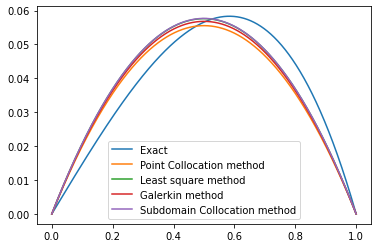

In [14]:
u_exact = sym.lambdify(x, u_exact)
v_a = sym.lambdify(x, v_a)
v_b = sym.lambdify(x, v_b)
v_c = sym.lambdify(x, v_c)
v_d = sym.lambdify(x, v_d)

xpts = np.linspace(0,1,1000)

plt.plot(xpts, u_exact(xpts), label="Exact")
plt.plot(xpts, v_a(xpts), label="Point Collocation method")
plt.plot(xpts, v_b(xpts), label="Least square method")
plt.plot(xpts, v_c(xpts), label="Galerkin method")
plt.plot(xpts, v_d(xpts), label="Subdomain Collocation method")
plt.legend()
plt.show()

Global error

[0.0051078401316330515, 0.005107661869334005, 0.0050826169052835555, 0.00511124456224446]


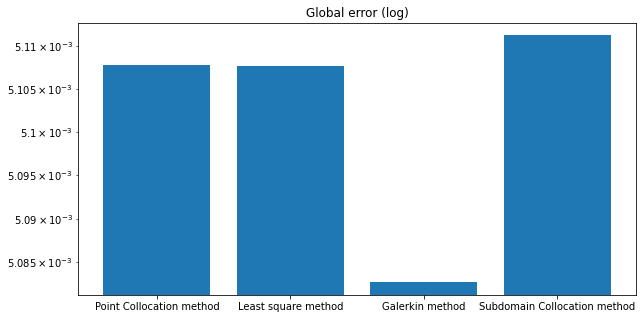

In [15]:
fig = plt.figure(figsize=(10,5))
global_error = [scipy_integrate_quad(lambda x: abs(u_exact(x) - v(x)), *xlim)[0] for v in (v_a, v_b, v_c, v_d)]
print(global_error)
plt.bar(("Point Collocation method", "Least square method", "Galerkin method", "Subdomain Collocation method"), global_error, log=True)
plt.title("Global error (log)")
plt.show()

## Example 2: Polynomial trial function

Problem

Differential equation:  $\frac{d^2 u}{dx^2} - u + x = 0$
Boundary conditions:    $u(0)=0$ and $u(1)=0$

In [16]:
x = sym.Symbol("x")
u = sym.Function("u")
bcs = ((0,0), (1,0))  # boundary conditions
xlim = (0,1)  # specify domain

eq = sym.Eq(sym.diff(u(x), x, x) - u(x) + x, 0)
eq

Eq(x - u(x) + Derivative(u(x), (x, 2)), 0)

(Exact solution)

In [17]:
u_exact = sym.dsolve(eq, u(x), ics={u(bc[0]):bc[1] for bc in bcs}).rhs
u_exact

x - exp(x)/(2*sinh(1)) + exp(-x)/(2*sinh(1))

Trial function

In [18]:
a = sym.Symbol("a")
b = sym.Symbol("b")
params = [a,b]
v = a*sym.sin(x*sym.pi) + b*sym.sin(2*x*sym.pi)

v

a*sin(pi*x) + b*sin(2*pi*x)

Residiuum

In [19]:
r = sym.simplify(eq.lhs.subs(u(x), v))
r

-a*sin(pi*x) - b*sin(2*pi*x) + x - pi**2*(a + 8*b*cos(pi*x))*sin(pi*x)

Test functions

### a) Point Collocation method

$w_i = \delta(x-x_i) = \begin{cases} 0 & \quad ,x\neq x_i \\ \infty & \quad ,x=x_i \end{cases}$

In [20]:
eq_a = []
for i, param in enumerate(params, 1):
    x_i = i * (xlim[0] + xlim[1])/(len(params)+1)
    w_i = sym.DiracDelta(x-x_i)
    eq_a.append(sym.Eq(sym.integrate(w_i*r, (x, *xlim)), 0))
eq_a

[Eq(-pi**2*a*sin(0.333333333333333*pi) - a*sin(0.333333333333333*pi) - 8*pi**2*b*sin(0.333333333333333*pi)*cos(0.333333333333333*pi) - b*sin(0.666666666666667*pi) + 0.333333333333333, 0),
 Eq(-pi**2*a*sin(0.666666666666667*pi) - a*sin(0.666666666666667*pi) - b*sin(1.33333333333333*pi) - 8*pi**2*b*sin(0.666666666666667*pi)*cos(0.666666666666667*pi) + 0.666666666666667, 0)]

In [21]:
sol = sym.solve(eq_a, params, dict=True)
print(sol)
v_a = v
for param in params:
    v_a = v_a.subs(param, sol[0][param])
v_a

[{a: 0.0531160332874454, b: -0.00475438767421477}]


0.0531160332874454*sin(pi*x) - 0.00475438767421477*sin(2*pi*x)

### b) Least square method

$w_i = \frac{\partial r}{\partial a_i}$

In [22]:
eq_b = []
for i, param in enumerate(params, 1):
    w_i = r.diff(param)
    eq_b.append(sym.Eq(sym.integrate(w_i*r, (x, *xlim)), 0))
eq_b

[Eq(a/2 + pi**2*a + pi**4*a/2 - pi - 1/pi, 0),
 Eq(b/2 + 4*pi**2*b + 8*pi**4*b + 1/(2*pi) + 2*pi, 0)]

In [23]:
sol = sym.solve(eq_b, params, dict=True)
print(sol)
v_b = v
for param in params:
    v_b = v_b.subs(param, sol[0][param])
v_b

[{b: -1/(pi + 4*pi**3), a: 2/(pi + pi**3)}]


2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3)

### c) Galerkin method

$w_i = \frac{\partial \tilde u}{\partial a_i}$

In [24]:
eq_c = []
for i, param in enumerate(params, 1):
    w_i = v.diff(param)
    eq_c.append(sym.Eq(sym.integrate(w_i*r, (x, *xlim)), 0))
eq_c

[Eq(-pi**2*a/2 - a/2 + 1/pi, 0), Eq(-2*pi**2*b - b/2 - 1/(2*pi), 0)]

In [25]:
sol = sym.solve(eq_c, params, dict=True)
v_c = v
for param in params:
    v_c = v_c.subs(param, sol[0][param])
v_c

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3)

### d) Subdomain Collocation method

$w_i = \begin{cases} 0 & \quad ,x \notin [x_a, x_b] \\ 1 & \quad ,x \in [x_a, x_b] \end{cases}$

In [26]:
eq_d = []
for i, param in enumerate(params, 1):
    dx = (xlim[1] - xlim[0])/len(params)
    x_a = (i-1)*dx
    x_b = i*dx
    eq_d.append(sym.Eq(sym.integrate(r, (x, x_a, x_b)), 0))
eq_d

[Eq(-a/pi - b/pi + pi**2*(-a/pi - 4*b/pi) + 0.125, 0),
 Eq(-a/pi + b/pi - pi**2*(a/pi - 4*b/pi) + 0.375, 0)]

In [27]:
sol = sym.solve(eq_d, params, dict=True)
v_d = v
for param in params:
    v_d = v_d.subs(param, sol[0][param])
v_d

0.0722563705555591*sin(pi*x) - 0.00970144350841548*sin(2*pi*x)

### Comparison

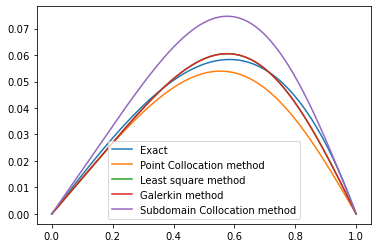

In [28]:
u_exact = sym.lambdify(x, u_exact)
v_a = sym.lambdify(x, v_a)
v_b = sym.lambdify(x, v_b)
v_c = sym.lambdify(x, v_c)
v_d = sym.lambdify(x, v_d)

xpts = np.linspace(0,1,1000)

plt.plot(xpts, u_exact(xpts), label="Exact")
plt.plot(xpts, v_a(xpts), label="Point Collocation method")
plt.plot(xpts, v_b(xpts), label="Least square method")
plt.plot(xpts, v_c(xpts), label="Galerkin method")
plt.plot(xpts, v_d(xpts), label="Subdomain Collocation method")
plt.legend()
plt.show()

Global error

[0.004068125719467824, 0.0015966411446355063, 0.0015966411446355063, 0.008141971086850764]


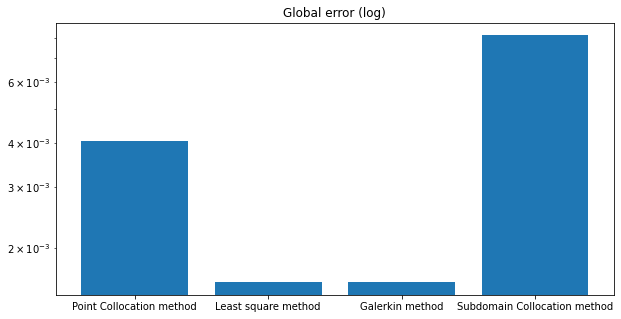

In [29]:
fig = plt.figure(figsize=(10,5))
global_error = [scipy_integrate_quad(lambda x: abs(u_exact(x) - v(x)), *xlim)[0] for v in (v_a, v_b, v_c, v_d)]
print(global_error)
plt.bar(("Point Collocation method", "Least square method", "Galerkin method", "Subdomain Collocation method"), global_error, log=True)
plt.title("Global error (log)")
plt.show()